In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import ensemble
from sklearn import datasets
from sklearn import preprocessing

from sklearn.utils import shuffle

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Create training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0


In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


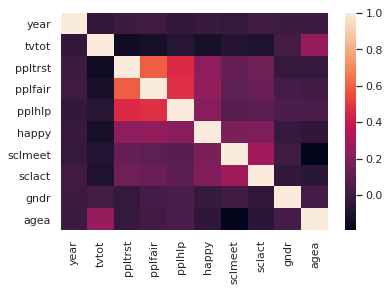

In [5]:
sns.heatmap(X.corr())

In [6]:
model = ensemble.GradientBoostingClassifier(loss='deviance', random_state=42)

param_grid={'n_estimators': [100, 250, 500, 750, 1000],
            'max_depth': [2, 3, 4],
            'subsample': [.1, .3, .5, .7, 1]}

grid = GridSearchCV(model, param_grid, cv=5)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 13min 10s, sys: 3.58 s, total: 13min 13s
Wall time: 13min 43s
{'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
0.7561374795417348


In [7]:
n_estimators = [100, 250, 500, 750 ,1000]
subsample = np.array([.1, .3, .5, .7, 1])

score_train =[]
score_test = []
prediction_test = []

for j in subsample:
    j_score_train = []
    j_score_test = []
    
    pred_test = []
    
    score_train.append(j_score_train)
    score_test.append(j_score_test)
    prediction_test.append(pred_test)

    for i in n_estimators:
        params = {'n_estimators': i,
              'max_depth': grid.best_params_['max_depth'],
              'loss': 'deviance',
              'subsample': j,}
        clf = ensemble.GradientBoostingClassifier(**params, random_state=42)
        clf.fit(X_train, y_train)
        j_score_train.append(clf.score(X_train, y_train))
        j_score_test.append(clf.score(X_test, y_test))
        pred_test.append(clf.predict(X_test))


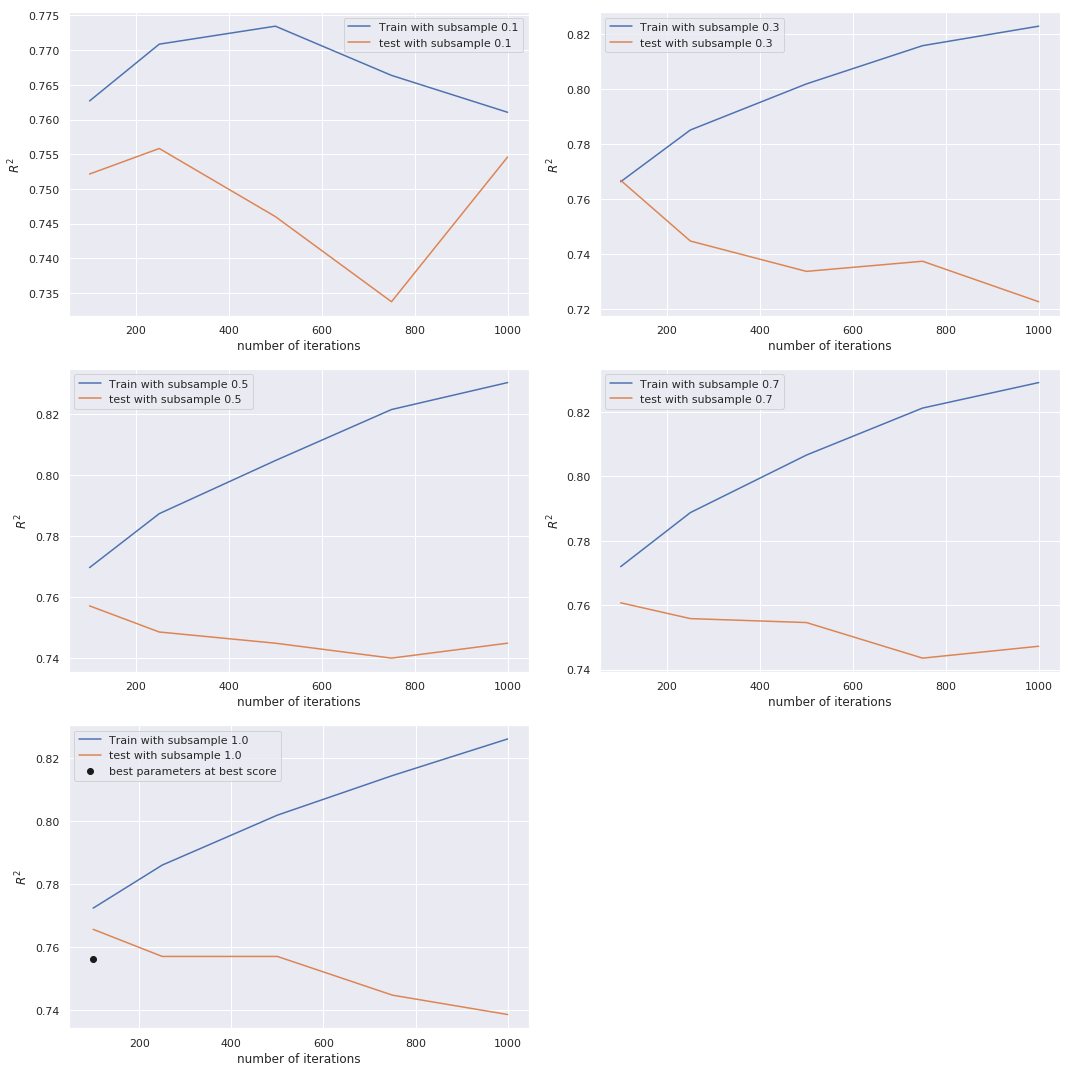

In [8]:
best_val_index = np.where(subsample == grid.best_params_['subsample'])[0][0]

plt.figure(figsize=(15,15))
for i in range(5):
    plt.subplot(3,2,i+1)       
    plt.plot(n_estimators, score_train[i], label='Train with subsample {}'.format(subsample[i]))
    plt.plot(n_estimators, score_test[i], label='test with subsample {}'.format(subsample[i]))
    if i == best_val_index:
        plt.scatter(grid.best_params_['n_estimators'], grid.best_score_, c='k',label='best parameters at best score')
    plt.xlabel('number of iterations')
    plt.ylabel('$R^2$')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [9]:
predict_train = grid.predict(X_train)
predict_test = grid.predict(X_test)

print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


0.772367703218767
0.7656441717791411
Training set accuracy:
Percent Type I errors: 0.04228041462084015
Percent Type II errors: 0.1853518821603928

Test set accuracy:
Percent Type I errors: 0.04539877300613497
Percent Type II errors: 0.18895705521472392


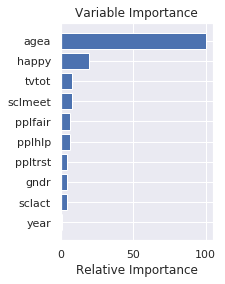

In [10]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!